# Вопросы к первому семестру

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Статистики-распределений" data-toc-modified-id="Статистики-распределений-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Статистики распределений</a></span></li><li><span><a href="#Многомерное-нормальное-распределение" data-toc-modified-id="Многомерное-нормальное-распределение-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Многомерное нормальное распределение</a></span></li></ul></div>

In [4]:
# Imports
import numpy as np
import scipy.stats as stats
np.random.seed(42)

import matplotlib.pyplot as plt

In [2]:
# Styles
import matplotlib
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['lines.linewidth'] = 1.5
matplotlib.rcParams['lines.markersize'] = 4
cm = plt.cm.tab10  # Colormap

import seaborn
seaborn.set_style('whitegrid')

In [ ]:
# import warnings
# warnings.filterwarnings('ignore')

---

## Статистики распределений

1. **Вопрос**: Дано нормальное распределение. Укажите моду, медиану и математическое ожидание. Что изменится, если добавить ещё одно, смещённое нормальное распределение?

In [37]:
N = int(2e5)
n_max, a = 2, 3
X1 = a*np.random.randint(0, n_max, N)
X2 = np.random.normal(loc=0, scale=1, size=N)

x = np.linspace(-3, 6, num=1001)
Y = np.zeros_like(x)
for i in range(0, n_max):
  Y += 1./n_max * stats.norm.pdf(x, loc=a*i, scale=1)

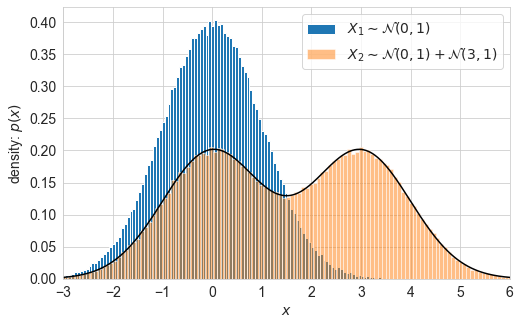

In [41]:
bins = 150
fig = plt.figure(figsize=(8, 5))
ax = plt.subplot(1,1,1)
# plt.title('Одномерные нормальные распределения')
plt.hist(X2, bins=bins, density=True, label='$X_1 \sim \mathcal{{N}}(0,1)$')
plt.hist(X1+X2, bins=bins, density=True, alpha=0.5,
         label='$X_2 \sim \mathcal{{N}}(0,1) + \mathcal{{N}}(3,1)$')
plt.plot(x, Y, c='k')

plt.xlabel('$x$')
plt.ylabel('density: $p(x)$')
plt.xlim([-3, 6])
plt.legend()
plt.show()

2. **Вопрос:** Пусть $\xi \sim \mathcal{{N}}(0,\sigma^2)$. Найти $\rho(\xi, \xi^n)$. \
   **Ответ:** $\rho = 0$ для чётных $n$ и $\rho = \dfrac{n!!}{\sqrt{(2n-1)!!}}$ для нечётных $n$.

---

## Многомерное нормальное распределение

1. **Вопрос:** Пусть случайный вектор $\xi$ имеет многомерное нормальное распределение $\mathcal{N}(\mu, \Sigma)$. Как вектор $\xi$ преобразовать в вектор $\eta$, состоящий из независимых стандартных нормальных случайных величин? \
   **Ответ:** $\eta = L^{-1} (\xi - \mu)$, где $\Sigma = L L^\top$.
   
1. **Вопрос:** Умножение на ортогональную матрицу, не меняет совместного распределения координат *стандартного нормального вектора*. А что можно с помощью поворота сделать с произвольным нормальным вектором? \
   **Ответ:** При повороте $Q$ матрица ковариаций $\Sigma$ преобразуется к виду $Q\Sigma Q^\top$. Однако симметричную положительно определённую матрицу можно ортогональными преобразованиями привести к диагональному виду. Вот почему любой нормальный вектор $\xi$ подходящим поворотом $\eta = Q \xi$ можно превратить в вектор с независимыми, но не обязательно одинаково распределёнными координатами.
   
1. **Вопрос:** Из некоррелированности случайных величин следует независимость? Привести контрпримеры. \
   **Ответ:** Случайные величины $\xi \sim \mathcal{N(0, 1)}$ и $\xi^2$ некоррелированы, но функционально зависимы.

---